<center>

# Web Intelligence

# Who will win the Tennis Australian Open 2020?

## 04 Validating The Prediction Model

### Riccardo Spolaor (864877)

</center>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import python_files.ValidationOperations as valop

In [2]:
dataframe = pd.read_csv('./datasets/dataframe03.csv', low_memory = False)

In [3]:
dataframe.head(10)

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankA,...,ISNER J.A,ISNER J.B,MOYA C.A,MOYA C.B,DAVYDENKO N.A,DAVYDENKO N.B,GONZALEZ F.A,GONZALEZ F.B,OtherA,OtherB
0,0,0,1.0,46,0,0,1,0,3.0,18.0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,1.0,46,0,0,1,0,3.0,442.0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1.0,46,0,0,1,0,3.0,23.0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1.0,46,0,0,1,0,3.0,69.0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,1.0,46,0,0,1,0,3.0,7.0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,1.0,46,0,0,1,0,3.0,99.0,...,0,0,0,0,0,0,0,0,1,1
6,0,0,1.0,46,0,0,1,0,3.0,91.0,...,0,0,0,0,0,0,0,0,1,1
7,1,0,1.0,46,0,0,1,0,3.0,67.0,...,0,0,0,0,0,0,0,0,1,1
8,0,0,1.0,46,0,0,1,0,3.0,79.0,...,0,0,0,0,0,0,0,0,1,1
9,1,0,1.0,46,0,0,1,0,3.0,95.0,...,0,0,0,0,0,0,0,0,1,1


Best Max csvID: 1 - Accuracy: 0.6928549334982987
Wall time: 1min 28s


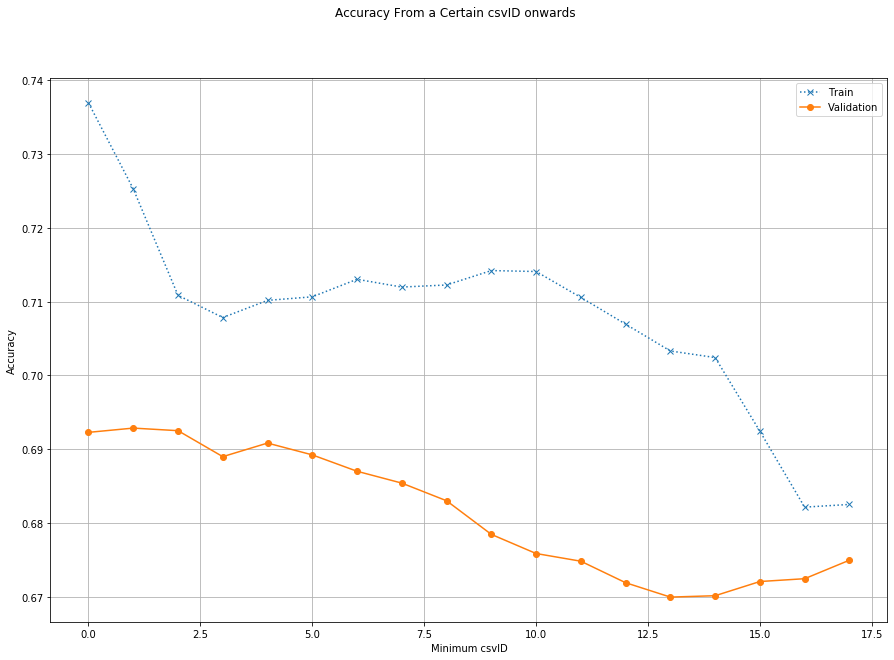

In [4]:
%%time
best_dataframe_split_index = valop.get_best_dataframe_split(dataframe)

In [5]:
dataframe = dataframe[dataframe['csvID'] >= best_dataframe_split_index]

dataframe.head()

,Winner,csvID,ATP,Location,Tournament,Series,Court,Round,Best of,RankA,...,ISNER J.A,ISNER J.B,MOYA C.A,MOYA C.B,DAVYDENKO N.A,DAVYDENKO N.B,GONZALEZ F.A,GONZALEZ F.B,OtherA,OtherB
2963,1,1,1.0,46,0,0,1,0,3.0,46.0,...,0,0,0,0,0,0,0,0,1,1
2964,0,1,1.0,46,0,0,1,0,3.0,153.0,...,0,0,0,0,0,0,0,0,1,1
2965,1,1,1.0,46,0,0,1,0,3.0,92.0,...,0,0,0,0,0,0,0,0,1,1
2966,0,1,1.0,46,0,0,1,0,3.0,221.0,...,0,0,0,0,0,0,0,0,1,1
2967,1,1,1.0,46,0,0,1,0,3.0,39.0,...,0,0,0,0,0,0,0,0,1,1


Best Max Depth: 5 - Accuracy: 0.6922762804806907
Best Max Features: 65 - Accuracy: 0.6933846692334616
Wall time: 23.9 s


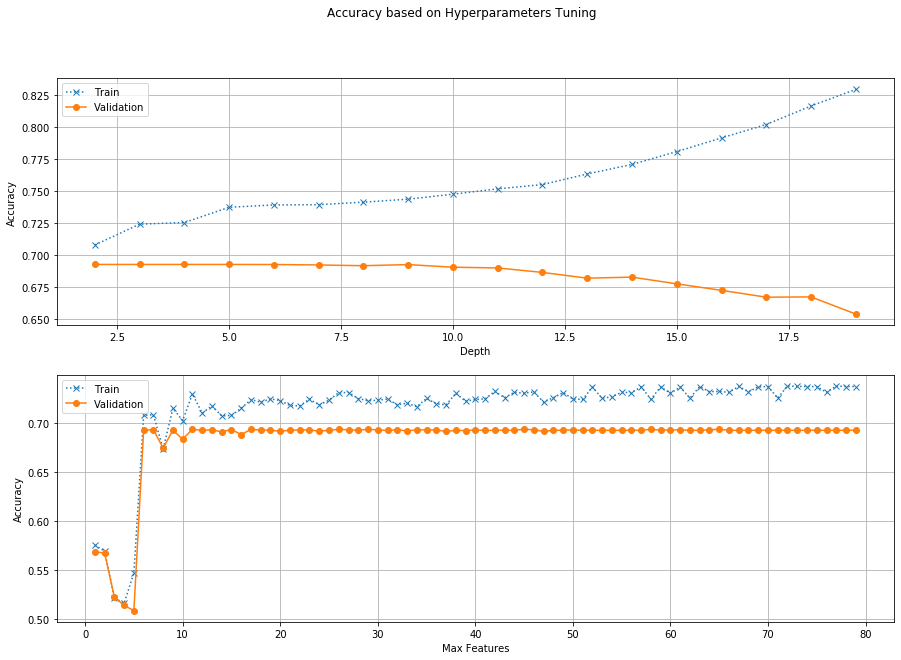

In [4]:
%%time
tree_best_features = valop.validate_tree_classifier(dataframe)

Wall time: 7.3 s


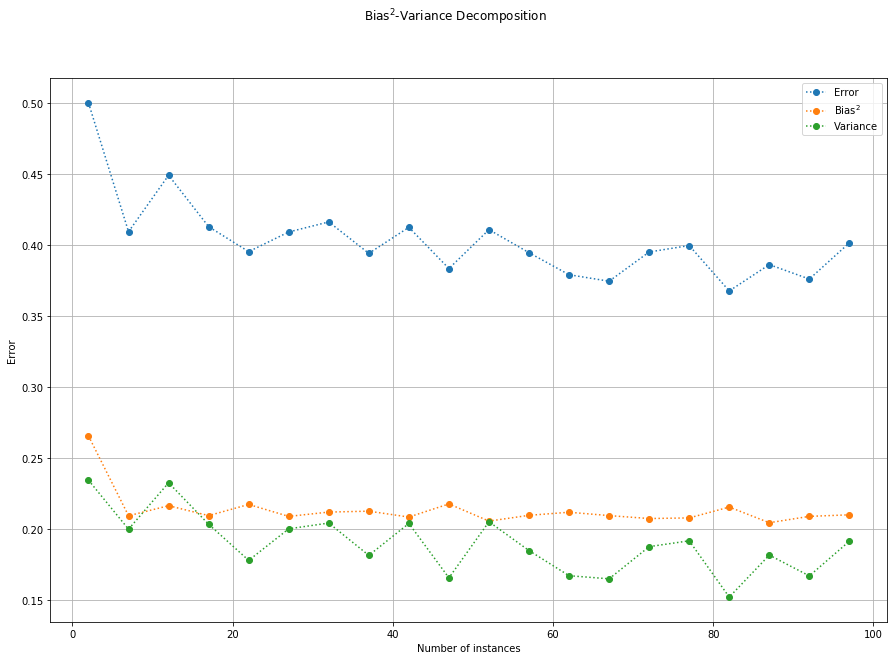

In [7]:
%%time
from sklearn.tree import DecisionTreeClassifier
valop.plot_estimator_variance_bias_decomposition(dataframe, DecisionTreeClassifier(max_depth = tree_best_features['depth'], 
                                                             max_features = tree_best_features['max_features']))

# IL BIAS e LA VARIANZA SONO PIUTTOSTO BASSI PER L'ALBERO CHE ABBIAMO COSTRUITO

Best Number of Estimators: 150 - Accuracy: 0.6938447262604392
Wall time: 1min 52s


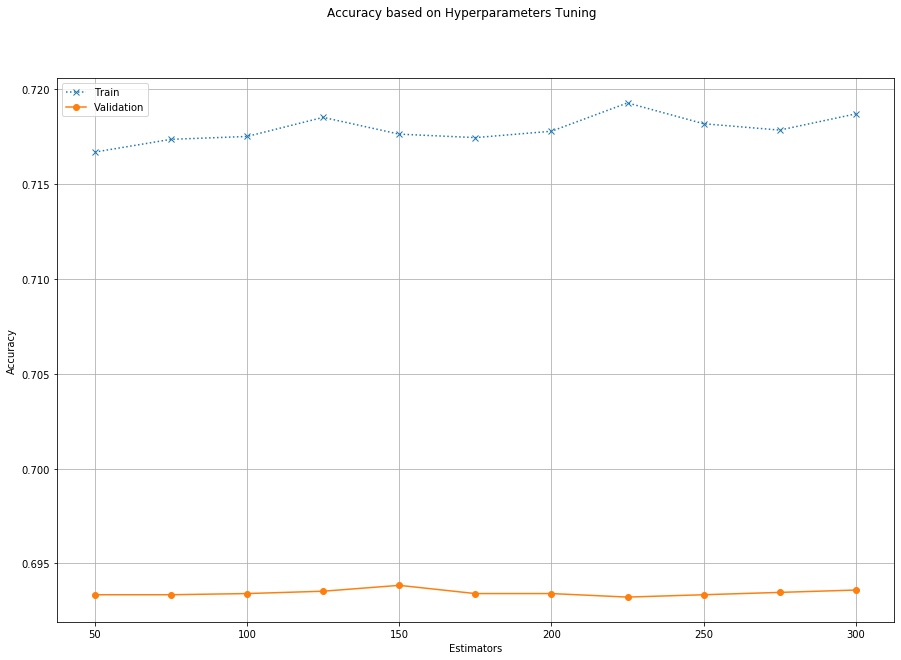

In [8]:
%%time
bagged_tree_best_n_estimators = valop.validate_bagged_tree_classifier(dataframe, tree_best_features)

Wall time: 1min 11s


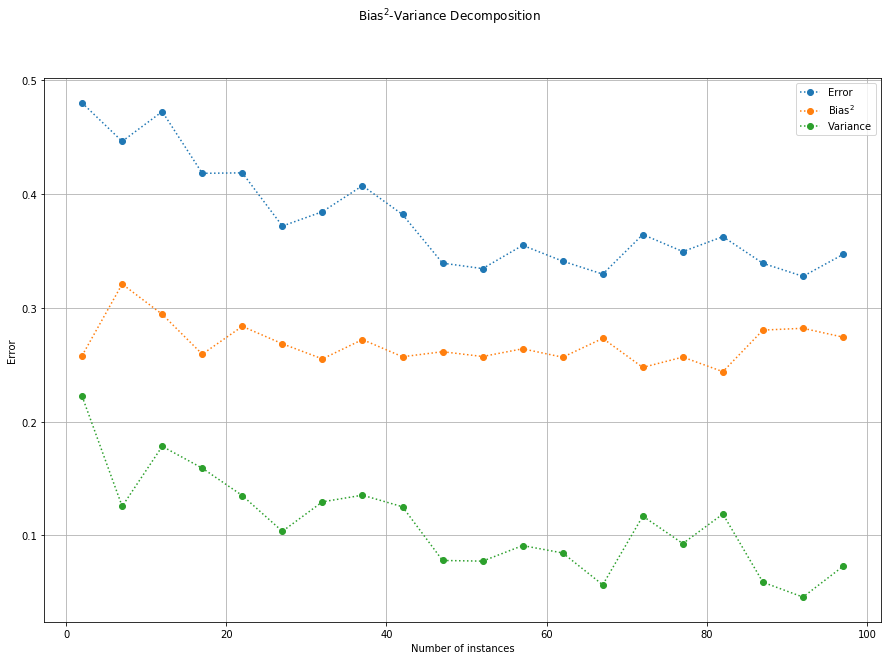

In [9]:
%%time
from sklearn.ensemble import BaggingClassifier

valop.plot_estimator_variance_bias_decomposition(dataframe,
    BaggingClassifier(DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=bagged_tree_best_n_estimators, n_jobs = -1), n_tests = 3)

#IL BAGGING RIDUCE UN PO' LA VARIANZA, MA PARE AUMENTARE IL BIAS

Best Number of Estimators: 3 - Accuracy: 0.6929167955459326
Wall time: 28.9 s


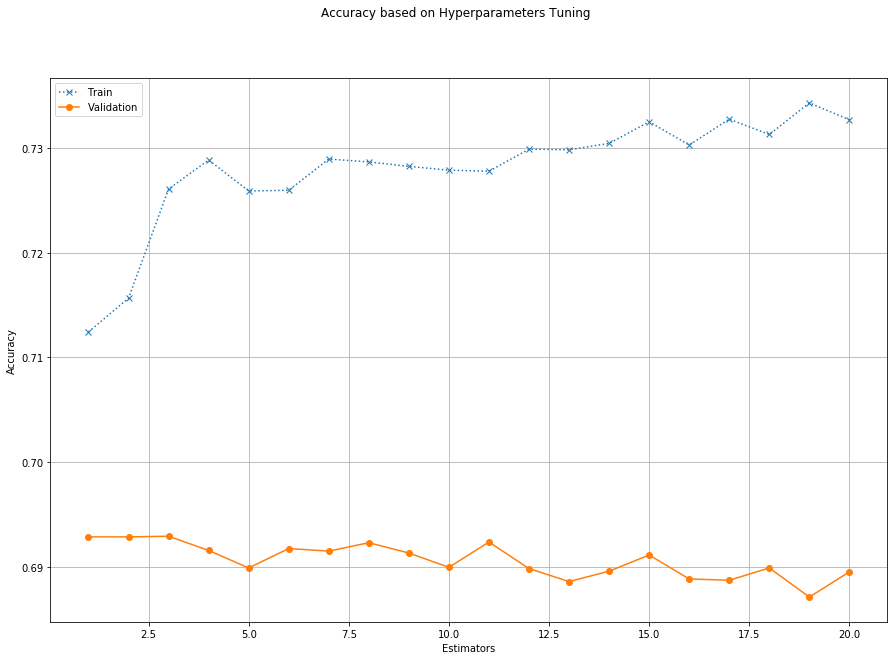

In [10]:
%%time
boosted_tree_best_n_estimators = valop.get_best_boosted_tree_n_estimators(dataframe, tree_best_features)

Wall time: 7.32 s


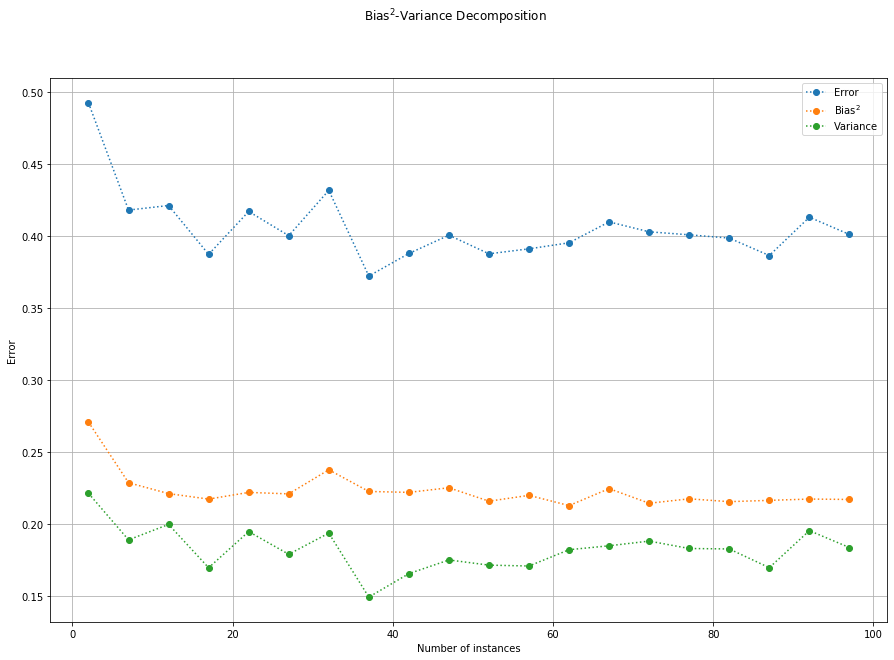

In [11]:
%%time
from sklearn.ensemble import AdaBoostClassifier

valop.plot_estimator_variance_bias_decomposition(dataframe,
    AdaBoostClassifier(DecisionTreeClassifier(max_depth = tree_best_features['depth'],
                                                  max_features = tree_best_features['max_features']), 
                      n_estimators=boosted_tree_best_n_estimators), n_tests = 10)

# LA BIAS RIMANE PIù O MENO INVARIATA, IL TUNING DEGLI IPERPARAMETRI E' STATO EFFICIENTE

Best Estimators Number 150 - Accuracy: 0.6859882462109496
Best Depth 12 - Accuracy: 0.6946489328796783
Wall time: 2min 12s


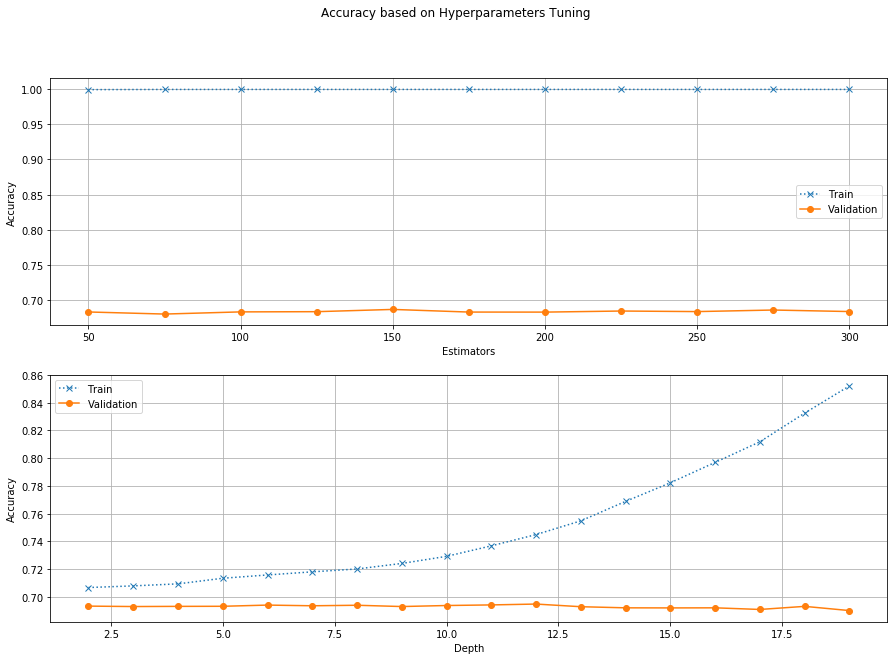

In [12]:
%%time
forest_best_features = valop.validate_forest_classifier(dataframe)

Wall time: 16.9 s


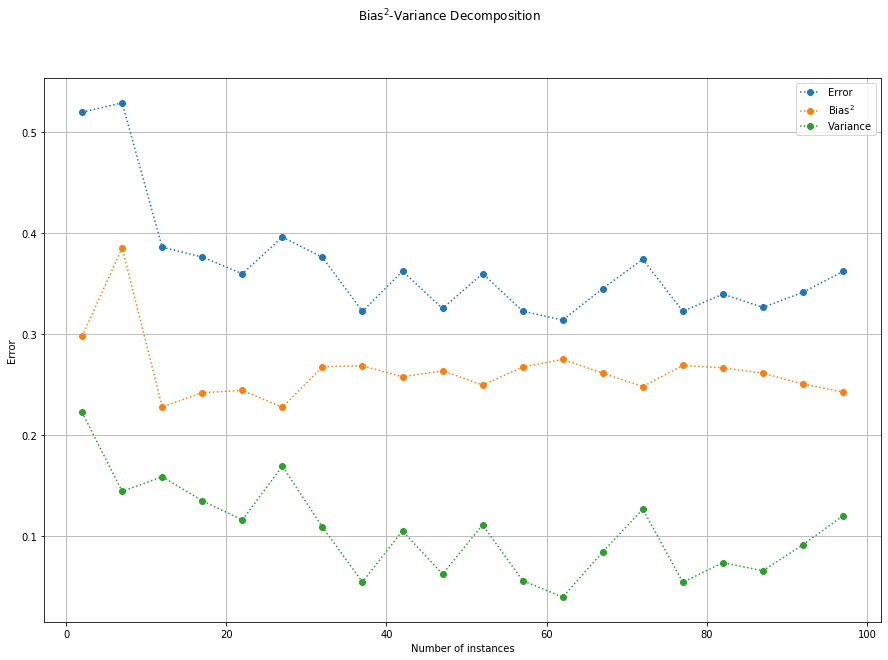

In [13]:
%%time
from sklearn.ensemble import RandomForestClassifier
valop.plot_estimator_variance_bias_decomposition(dataframe,
                                           RandomForestClassifier(n_estimators = forest_best_features['n_estimators']),
                                                                  n_tests = 3)

# LA BIAS CRESCE DI POCO, FORSE QUESTO PORTA AD UN PEGGIORAMENTO DELL'ACCURATEZZA

Wall time: 17.5 s


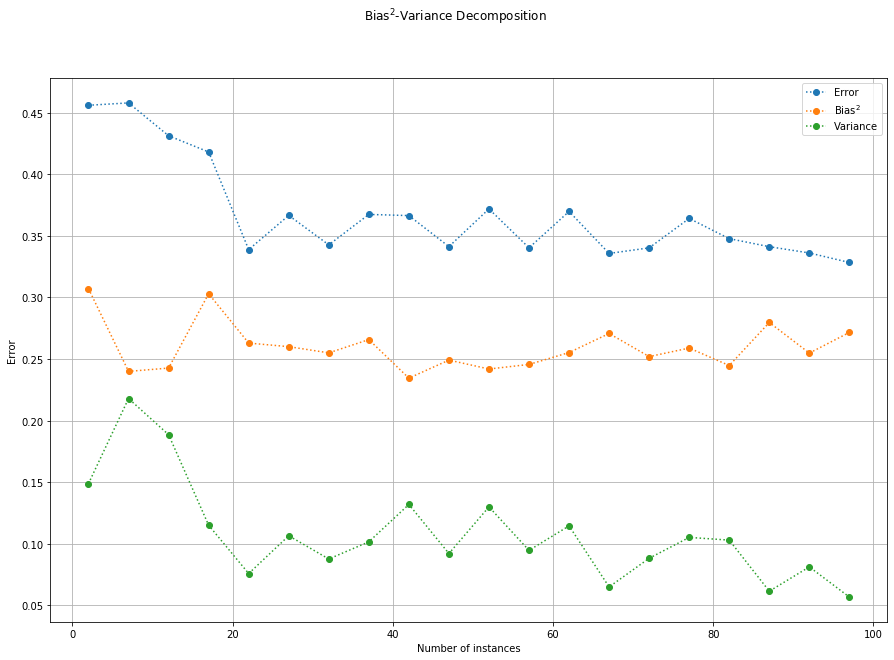

In [14]:
%%time
valop.plot_estimator_variance_bias_decomposition(dataframe,
                                                 RandomForestClassifier(n_estimators = forest_best_features['n_estimators'],
                                                                 max_depth = forest_best_features['max_depth']),
                                                                  n_tests = 3)

# LA FORESTA COL TUNING DEI PARAMETRI PORTA AD UN RISULTATO SIMILE RISPETTO ALL'ALBERO, PROBABILMENTE PERCHé LA BIAS CRESCE UN PO'
# MENTRE LA VARIANZA DIMINUISCE

In [15]:
'''
#Feature Importance

def getPredImportance (): 
    
    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)
    
    rf = RandomForestClassifier(n_estimators=250)
    rf.fit(X_train,y_train)

    return rf.feature_importances_

featImp = getPredImportance()
'''

"\n#Feature Importance\n\ndef getPredImportance (): \n    \n    X_train, X_valid, y_train, y_valid = train_test_split(dataframe.loc[:, dataframe.columns != 'Winner'],  \n                                                        dataframe['Winner'], test_size=0.33, shuffle = False, stratify=None)\n    \n    rf = RandomForestClassifier(n_estimators=250)\n    rf.fit(X_train,y_train)\n\n    return rf.feature_importances_\n\nfeatImp = getPredImportance()\n"

In [16]:
'''
#Print feature importance

for (j,k) in sorted((e,i) for i,e in enumerate(featImp)):
    print(dataframe.columns[k])
    
'''

'\n#Print feature importance\n\nfor (j,k) in sorted((e,i) for i,e in enumerate(featImp)):\n    print(dataframe.columns[k])\n    \n'

In [17]:
'''from sklearn.feature_selection import RFE

rf_small = RandomForestClassifier(n_estimators=20)
selector = RFE(rf_small, 
                 step=1, # features removed at each step
                 n_features_to_select=1 # selected features
                )
fit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  
                                                        dataframe['Winner'])
                                                        '''

"from sklearn.feature_selection import RFE\n\nrf_small = RandomForestClassifier(n_estimators=20)\nselector = RFE(rf_small, \n                 step=1, # features removed at each step\n                 n_features_to_select=1 # selected features\n                )\nfit = selector.fit(dataframe.loc[:, dataframe.columns != 'Winner'],  \n                                                        dataframe['Winner'])\n                                                        "

In [18]:
#accuracy_score(y_true=dataframe['Winner'], y_pred=rf.predict(fit.predict(dataframe.loc[:, dataframe.columns != 'Winner'])))